In [1]:
from sklearn.neighbors      import KDTree
from random                 import sample
from sklearn.decomposition  import PCA
import tadasets
import numpy                as np
import matplotlib.pyplot    as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
class Simplex:
    """
    Represents the simplex skeleton of 
    our pointcloud.
    """

    def __init__(self):
        """
        Attributes
        ----------
        pointcloud : (n_samples, n_features) np.array
            The pointcloud data from which we build our simplex.
        simplex : np.array
            ???
        dim : int 
            dimension of our simplex.
        """
        self.pointcloud = None
        self.simplex = None
        self.dim = None
    
    def find_visible_edge(self, idx, ind, dist):
        """
        Computes a list of the indexes of points visible from 
        the 'idx' point, then returns the visible edges and their distances 
        as sorted by  distances


        Parameters
        ----------
        idx : int
            Index of a point.
        ind : (k,) np.array
            Indexes of points connected to the idx point by KNN.
        
        Returns
        -------
        sorted_dist : (n_visible_edges,) np.array
            Lengths of 'visible' edges sorted by acsending.
        sorted_ind : (n_visible_edges,) np.array
            Indexes of visible edges sorted by acsending length (self.pointcloud).
        sorted_visible_edges : (n_visible_edges, n_features) np.array
            Array of visible edges sorted by acsending length.
        """
        point = self.pointcloud[idx]
        # List of indexes for visible points from the 'idx' point
        # where the indexes are for 'ind' (not self.pointcloud)
        visible_points_idx = [] 
        visible = True

        for y_count, idy in enumerate(ind):
            y = self.pointcloud[idy]
            for idz in ind:
                if idz != idy:
                    z = self.pointcloud[idz]
                    cos_angle = np.dot(point - z, y - z)  
                    if cos_angle < 0:
                        visible = False
                        break
            if visible == True:
                visible_points_idx.append(y_count)  
            visible = True
        
        argsort_idx = np.argsort(dist[visible_points_idx])
        sorted_dist = dist[visible_points_idx][argsort_idx]
        sorted_ind = ind[visible_points_idx][argsort_idx]

        sorted_visible_edges_idx = ind[visible_points_idx][argsort_idx]
        sorted_visible_edges = self.pointcloud[sorted_visible_edges_idx] - point

        

        return sorted_dist, sorted_ind, sorted_visible_edges

    def build_edges(self, pointcloud, k=10, threshold_var=0.999, threshold_edge=0):
        """
        Computes the safe edges of our simplex.

        Parameters
        ----------
        pointcloud : (n_samples, n_features) np.array
            The pointcloud data from which we build our simplex.
        k : int
            The number of NN we use.
        threshold_var : [0,1] float
            The threshold to estimate the local intrinsic dimension by PCA.
        threshold_edge : positive float
            The threshold to choose safe edges.
        """
        self.pointcloud = pointcloud
        kd_tree = KDTree(pointcloud, leaf_size=2)  # ALREADY ORDERED
        dists, inds = kd_tree.query(pointcloud, k=k+1)
        
        dists = dists[:, 1:]  # removes points being compared to itself with KNN
        inds = inds[:, 1:]

        dists_inds = [self.find_visible_edge(i, inds[i], dists[i]) for i in range(len(inds))]













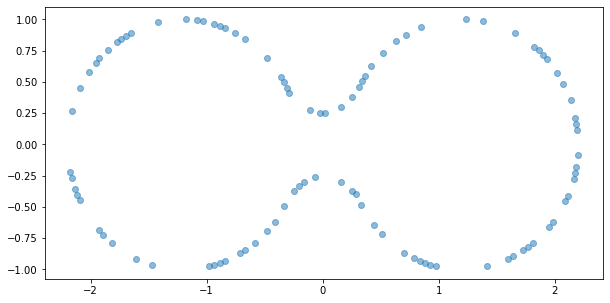

In [2]:
eyeglasses = np.loadtxt('eyeglasses_tight.txt')
pointcloud = np.array(sample(list(eyeglasses), 100))
fig = plt.figure(figsize =(10,5))
plt.scatter(pointcloud[:,0], pointcloud[:,1], alpha = 0.5);

In [3]:
def plot_graph(local_neighborhood):
    fig = plt.figure(figsize =(10,5))
    plt.scatter(pointcloud[:,0], pointcloud[:,1], alpha = 0.5)
    for j in range(len(local_neighborhood)):
        for i in range(1, len(local_neighborhood[j])):
            plt.plot([local_neighborhood[j][0][0],local_neighborhood[j][i][0]], [local_neighborhood[j][0][1],local_neighborhood[j][i][1]])